# Predicting Patients Survival
A hospital has been trying to improve its care conditions by looking at historic survival of the patients. They tried looking at their data but could not identify the main factors leading to high survivals.

The goal here is to develop a machine learning model that will predict the chances of survival of a patient after 1 year of treatment.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
patients_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_advc.csv')

In [8]:
patients_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,16201,47,8433,DX2,60,21.655523,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,9421,3,2972,DX6,2,28.852743,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,16205,7,8608,Dx6,20,26.179725,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,5582,31,10074,dx6,8,22.638945,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,20880,43,7462,dx1,53,21.326131,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [9]:
patients_data.shape

(25079, 18)

In [10]:
patients_data.nunique()

ID_Patient_Care_Situation    23097
Diagnosed_Condition             53
Patient_ID                   10599
Treated_with_drugs             182
Patient_Age                     74
Patient_Body_Mass_Index      10599
Patient_Smoker                  10
Patient_Rural_Urban              2
Patient_mental_condition         1
A                                2
B                                2
C                                2
D                                2
E                                2
F                                2
Z                                2
Number_of_prev_cond              5
Survived_1_year                  2
dtype: int64

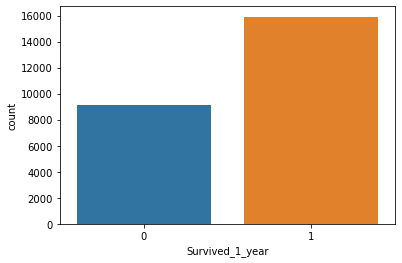

In [11]:
sns.countplot(patients_data['Survived_1_year'])
plt.show()

In [12]:
patients_data['Survived_1_year'].value_counts()

1    15908
0     9171
Name: Survived_1_year, dtype: int64

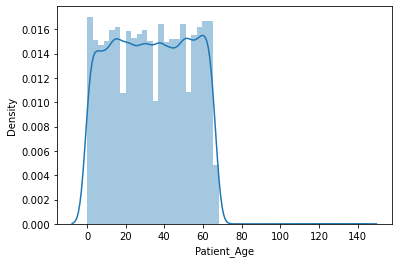

In [13]:
sns.distplot(patients_data['Patient_Age'])
plt.show()

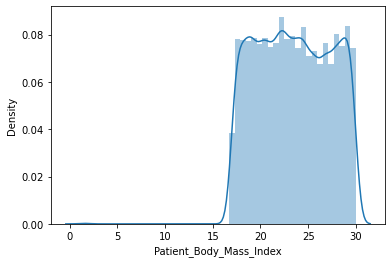

In [14]:
sns.distplot(patients_data['Patient_Body_Mass_Index'])
plt.show()

In [15]:
patients_data.Patient_Smoker.unique()

array(['NO', 'NO ', 'YES', 'YES ', 'YESS ', 'YESS', 'Cannot say ',
       'Cannot say', 'CANNOT SAY ', 'CANNOT SAY'], dtype=object)

In [16]:
patient_smoker_replace = {"NO ":"NO", "YES ":"YES", "YESS ":"YES", "YESS":"YES", "Cannot say ":"Cannot say", "CANNOT SAY ":"Cannot say", "CANNOT SAY":"Cannot say"}
patients_data = patients_data.replace({"Patient_Smoker": patient_smoker_replace})

In [17]:
patients_data.Patient_Smoker.unique()

array(['NO', 'YES', 'Cannot say'], dtype=object)

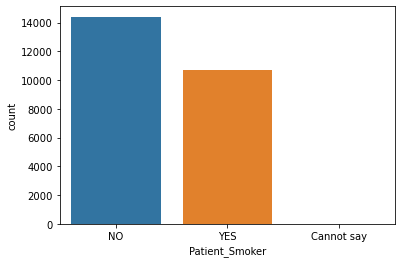

In [18]:
sns.countplot(patients_data['Patient_Smoker'])
plt.show()

In [19]:
patients_data['Patient_Smoker'].value_counts()

NO            14402
YES           10669
Cannot say        8
Name: Patient_Smoker, dtype: int64

In [20]:
patients_data["Patient_Smoker"].replace({"NO":0, "YES":1, "Cannot say":2}, inplace=True)

In [21]:
patients_data.Patient_mental_condition.unique()

array(['Stable'], dtype=object)

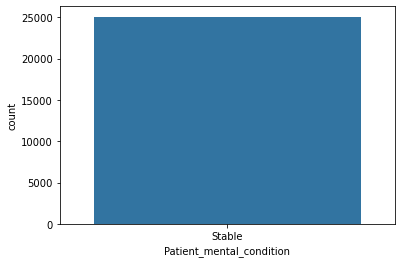

In [22]:
sns.countplot(patients_data['Patient_mental_condition'])
plt.show()

Looks like Patient mental condition is Stable for all patients.

In [23]:
patients_data["Patient_mental_condition"].replace({"Stable": 1}, inplace=True)

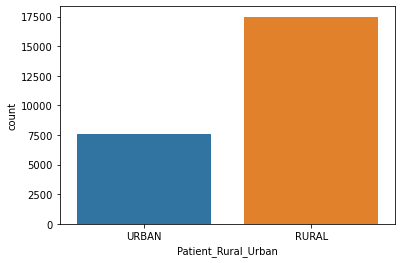

In [24]:
sns.countplot(patients_data['Patient_Rural_Urban'])
plt.show()

Large number of patients live in rural areas.

In [25]:
patients_data["Patient_Rural_Urban"].replace({"RURAL":0, "URBAN":1}, inplace=True)

In [26]:
patients_data.Patient_Rural_Urban.unique()

array([1, 0], dtype=int64)

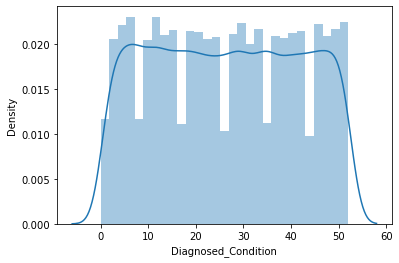

In [27]:
sns.distplot(patients_data['Diagnosed_Condition'])
plt.show()

In [28]:
patients_data.sample(3)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
5078,26855,37,6330,DX6,38,26.998569,1,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0
24413,16131,45,10439,DX2 DX3 DX4,9,20.486860,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2319,11899,49,7775,DX6,16,20.933532,1,1,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0


In [29]:
patients_data.Treated_with_drugs.unique()

array(['DX2', 'DX6', 'Dx6', 'dx6 ', 'dx1', 'dx1 dx3 dx4 ', 'DX5 ', 'dx2 ',
       'dx6', 'DX2 DX5 ', 'DX6 ', 'DX1', 'DX3 DX5', 'DX1 DX3', 'DX3 DX4 ',
       'Dx3', 'DX2 DX3', 'DX1 ', 'DX3', 'dx4', 'Dx2', 'Dx1', 'dx1 ',
       'DX1 DX2 DX3 DX5', 'Dx1 dx3', 'Dx5', 'DX2 ', 'DX4 ', 'DX4', 'dx3 ',
       'DX3 DX4 DX5 ', 'DX1 DX3 ', 'DX2 DX5', 'dx3', 'DX1 DX5', 'DX2 DX4',
       'dx2 dx3 ', 'dx2', 'DX3 DX5 ', 'DX5', 'DX2 DX3 DX4 ', 'DX4 DX5 ',
       'DX3 ', 'DX1 DX5 ', 'dx5', 'Dx4', 'DX1 DX3 DX5', 'DX1 DX4 ',
       'DX4 DX5', 'dx4 dx5', 'DX1 DX2 ', 'DX1 DX3 DX5 ', 'dx1 dx4',
       'dx4 dx5 ', 'Dx1 dx4 ', 'Dx1 dx2 dx4 dx5 ', 'DX1 DX2', 'Dx4 dx5',
       'DX1 DX3 DX4', 'DX1 DX2 DX3', 'Dx1 dx2', 'DX1 DX4 DX5 ',
       'Dx1 dx2 ', 'DX1 DX4', 'dx2 dx5', 'dx3 dx4', 'DX3 DX4', 'dx2 dx4',
       'Dx2 ', 'DX3 DX4 DX5', 'Dx5 ', 'Dx1 dx3 ', 'dx3 dx5', 'Dx6 ',
       'DX1 DX3 DX4 ', 'DX1 DX2 DX4', 'dx5 ', 'DX2 DX4 ', 'DX1 DX4 DX5',
       'Dx1 dx2 dx3 dx5', 'dx1 dx3 dx5 ', 'Dx2 dx5', 'dx2 dx3 dx4 ',


## Handle missing values

In [30]:
patients_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs              8
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1356
B                            1356
C                            1356
D                            1356
E                            1356
F                            1356
Z                            1356
Number_of_prev_cond          1356
Survived_1_year                 0
dtype: int64

In [31]:
patients_data[patients_data.isnull().any(axis=1)]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
45,29462,19,3231,DX6,50,27.994080,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
61,5332,46,3161,DX2 DX5,18,21.713657,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
76,19576,35,9364,DX6,18,20.125493,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
86,32024,31,3154,DX3 DX5,16,27.182629,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
133,10359,52,10544,Dx6,27,20.167178,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24963,10645,46,10108,DX1 DX2,55,18.694524,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
24973,18473,23,4635,DX6,5,25.445119,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
24989,12134,38,3462,Dx6,17,20.096695,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
24999,1351,45,5898,DX4,33,25.748274,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [71]:
print("Before filling null values \n", patients_data['A'].value_counts(), "\n")
patients_data['A'] = patients_data['A'].fillna(method="ffill")
print("After filling null values \n", patients_data['A'].value_counts())

Before filling null values 
 1.0    22394
0.0     2685
Name: A, dtype: int64 

After filling null values 
 1.0    22394
0.0     2685
Name: A, dtype: int64


In [70]:
print("Before filling null values \n", patients_data['B'].value_counts(), "\n")
patients_data['B'] =patients_data['B'].fillna(method="ffill")
print("After filling null values \n", patients_data['B'].value_counts())

Before filling null values 
 0.0    21671
1.0     3408
Name: B, dtype: int64 

After filling null values 
 0.0    21671
1.0     3408
Name: B, dtype: int64


In [34]:
print("Before filling null values \n", patients_data['C'].value_counts(), "\n")
patients_data['C'] = patients_data['C'].fillna(method="ffill")
print("After filling null values \n", patients_data['C'].value_counts())

Before filling null values 
 0.0    19372
1.0     4351
Name: C, dtype: int64 

After filling null values 
 0.0    20465
1.0     4614
Name: C, dtype: int64


In [35]:
print("Before filling null values \n", patients_data['D'].value_counts(), "\n")
patients_data['D'] = patients_data['D'].fillna(method="ffill")
print("After filling null values \n", patients_data['D'].value_counts())

Before filling null values 
 0.0    21737
1.0     1986
Name: D, dtype: int64 

After filling null values 
 0.0    22969
1.0     2110
Name: D, dtype: int64


In [36]:
print("Before filling null values \n", patients_data['E'].value_counts(), "\n")
patients_data['E'] = patients_data['E'].fillna(method="ffill")
print("After filling null values \n", patients_data['E'].value_counts())

Before filling null values 
 0.0    14323
1.0     9400
Name: E, dtype: int64 

After filling null values 
 0.0    15131
1.0     9948
Name: E, dtype: int64


In [37]:
print("Before filling null values \n", patients_data['F'].value_counts(), "\n")
patients_data['F'] = patients_data['F'].fillna(method="ffill")
print("After filling null values \n", patients_data['F'].value_counts())

Before filling null values 
 0.0    22432
1.0     1291
Name: F, dtype: int64 

After filling null values 
 0.0    23706
1.0     1373
Name: F, dtype: int64


In [38]:
print("Before filling null values \n", patients_data['Z'].value_counts(), "\n")
patients_data['Z'] = patients_data['Z'].fillna(method="ffill")
print("After filling null values \n", patients_data['Z'].value_counts())

Before filling null values 
 0.0    23715
1.0        8
Name: Z, dtype: int64 

After filling null values 
 0.0    25069
1.0       10
Name: Z, dtype: int64


In [74]:
patients_data['Number_of_prev_cond'] = patients_data[['A', 'B', 'C', 'D', 'E', 'F', 'Z']].sum(axis=1)

In [75]:
patients_data['Number_of_prev_cond'].value_counts()

1.0    10798
2.0    10311
3.0     3484
4.0      445
5.0       41
Name: Number_of_prev_cond, dtype: int64

In [77]:
#Majority of the patients have had at least 1 or 2 conditions in the past

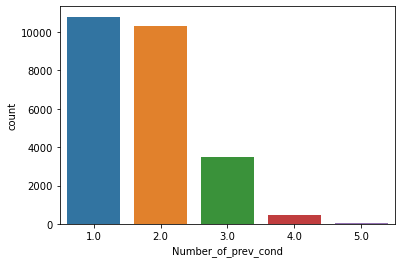

In [78]:
sns.countplot(patients_data['Number_of_prev_cond'])
plt.show()

In [42]:
patients_data['Treated_with_drugs'] = patients_data['Treated_with_drugs'].str.upper()  #UpperCase the column's title
pharma_drug_dummies = patients_data['Treated_with_drugs'].str.get_dummies(sep=' ')   #creation of a dummy dataframe

In [43]:
pharma_drug_dummies.head()

,DX1,DX2,DX3,DX4,DX5,DX6
0,0,1,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,1,0,0,0,0,0


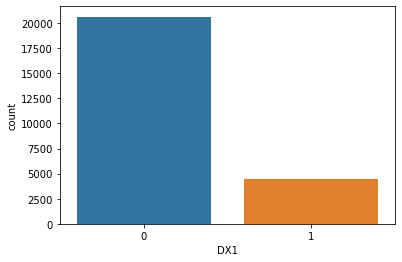

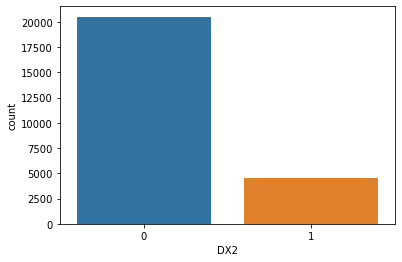

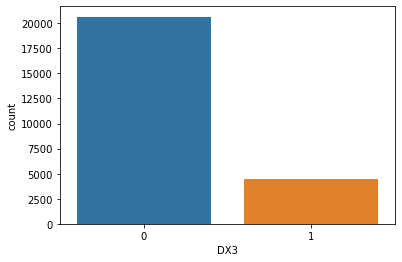

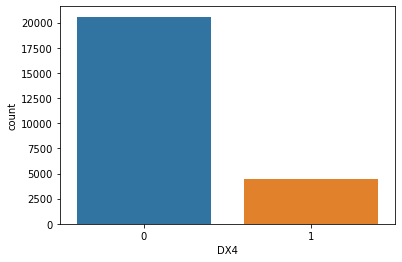

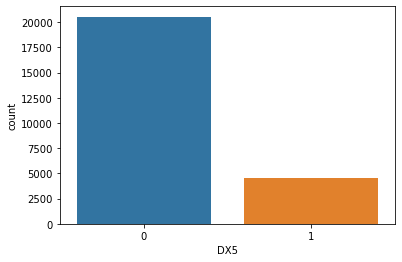

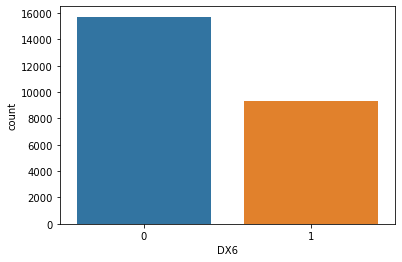

In [85]:
sns.countplot(pharma_drug_dummies['DX1'])
plt.show()
sns.countplot(pharma_drug_dummies['DX2'])
plt.show()
sns.countplot(pharma_drug_dummies['DX3'])
plt.show()
sns.countplot(pharma_drug_dummies['DX4'])
plt.show()
sns.countplot(pharma_drug_dummies['DX5'])
plt.show()
sns.countplot(pharma_drug_dummies['DX6'])
plt.show()

0 explains the patients who did not use assigned medicine, 1 explains those who have used assigned medicine.
Based on the observation, DX6 had th emost influence among other medicines on the patients.

In [50]:
patients_data = pd.concat([patients_data, pharma_drug_dummies], axis=1)               #concatenate the dummy dataframe with the original dataframe

In [51]:
patients_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           8
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
DX1                          0
DX2                          0
DX3                          0
DX4                          0
DX5                          0
DX6                          0
dtype: int64

In [52]:
patients_data.drop(['Treated_with_drugs', 'ID_Patient_Care_Situation', 'Patient_ID'], axis=1, inplace=True)

In [53]:
patients_data.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,...,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6
0,47,60,21.655523,0,1,1,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,1,0,1,0,0,0,0
1,3,2,28.852743,0,0,1,1.0,0.0,1.0,0.0,...,0.0,0.0,3.0,0,0,0,0,0,0,1
2,7,20,26.179725,0,0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,1,0,0,0,0,0,1
3,31,8,22.638945,0,0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0,0,0,0,0,0,1
4,43,53,21.326131,0,0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,1,0,0,0,0,0


In [54]:
print(patients_data.dtypes)
print(patients_data.shape)

Diagnosed_Condition           int64
Patient_Age                   int64
Patient_Body_Mass_Index     float64
Patient_Smoker                int64
Patient_Rural_Urban           int64
Patient_mental_condition      int64
A                           float64
B                           float64
C                           float64
D                           float64
E                           float64
F                           float64
Z                           float64
Number_of_prev_cond         float64
Survived_1_year               int64
DX1                           int64
DX2                           int64
DX3                           int64
DX4                           int64
DX5                           int64
DX6                           int64
dtype: object
(25079, 21)


In [55]:
#Split data into features(X) and target(y)
X = patients_data.drop('Survived_1_year',axis=1)
y = patients_data.Survived_1_year
X.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6
0,47,60,21.655523,0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,1,0,0,0,0
1,3,2,28.852743,0,0,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0,0,0,0,0,1
2,7,20,26.179725,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,1
3,31,8,22.638945,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,1
4,43,53,21.326131,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0


## Split the data into train and test set and train the model

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, \
    confusion_matrix, f1_score, roc_auc_score, recall_score

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Fit the data into various models and evaluate the performance of each

In [88]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("LogisticRegression model")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))

LogisticRegression model
Accuracy Score: 0.7280701754385965
F1 Score: 0.8011197947043042
Recall Score: 0.8497896560257362


C:\Users\CSUFTitan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 7)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
print("DecisionTreeClassifier model")
print("Accuracy Score:", accuracy_score(y_test, y_pred_dtc))
print("F1 Score:", f1_score(y_test, y_pred_dtc))
print("Recall Score:", recall_score(y_test, y_pred_dtc))

DecisionTreeClassifier model
Accuracy Score: 0.7945773524720893
F1 Score: 0.8398806563898558
Recall Score: 0.835931700074239


In [89]:
from sklearn.ensemble import RandomForestClassifier
randf = RandomForestClassifier(n_estimators = 300, random_state = 0)
randf.fit(X_train, y_train)
y_pred_randf = randf.predict(X_test)
print("RandomForestClassifier model")
print("Accuracy Score:", accuracy_score(y_test, y_pred_randf))
print("F1 Score:", f1_score(y_test, y_pred_randf))
print("Recall Score:", recall_score(y_test, y_pred_randf))

RandomForestClassifier model
Accuracy Score: 0.8365231259968102
F1 Score: 0.8751978570558869
Recall Score: 0.8893838158871566


In [ ]:
#now we are going to install xgboost and check the performance

In [ ]:
!pip3 install xgboost

In [98]:

from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=300)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoostClassifier model")
print("Accuracy Score:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("Recall Score:", recall_score(y_test, y_pred_xgb))

XGBoostClassifier model
Accuracy Score: 0.8350877192982457
F1 Score: 0.8726914553065748
Recall Score: 0.8770106409304628


#Check model performance using new test data

In [99]:
new_test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_advc.csv')
new_test.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,24206,35,4640,DX5,65,20.710365,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,32827,30,3214,dx1,2,24.250219,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
2,3694,46,3564,dx6,1,27.139276,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7164,44,5176,DX1,29,29.191759,NO,RURAL,Stable,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
4,1259,30,1101,DX5,51,20.844146,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [100]:
new_test.shape

(9330, 17)

In [101]:
new_test.Patient_Smoker.unique()

array(['NO', 'NO ', 'YES ', 'YES', 'YESS', 'YESS '], dtype=object)

In [102]:
patient_smoker_replace = {"NO ":"NO", "YES ":"YES", "YESS ":"YES", "YESS":"YES", "Cannot say ":"Cannot say", "CANNOT SAY ":"Cannot say", "CANNOT SAY":"Cannot say"}
new_test = new_test.replace({"Patient_Smoker": patient_smoker_replace})
new_test["Patient_Smoker"].replace({"NO":0, "YES":1, "Cannot say":2}, inplace=True)

In [103]:
new_test["Patient_Rural_Urban"].replace({"RURAL":0, "URBAN":1}, inplace=True)

In [104]:
new_test["Patient_mental_condition"].replace({"Stable": 1}, inplace=True)

In [105]:
new_test['Treated_with_drugs'] = new_test['Treated_with_drugs'].str.upper()  #change the values in this column to upppercase
test_drug_dummies = new_test['Treated_with_drugs'].str.get_dummies(sep=' ')   #create a dummy value
new_test = pd.concat([new_test, test_drug_dummies], axis=1)               #concatenate the dummy dataframe with the original dataframe

In [106]:
new_test.drop(['Treated_with_drugs', 'ID_Patient_Care_Situation', 'Patient_ID'], axis=1, inplace=True)

In [107]:
new_test.shape

(9330, 20)

## Predict patients survival using the created XGBoostClassifier model

In [108]:
Survived_1_year_xgb = xgb.predict(new_test)
Survived_1_year_xgb

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [109]:
Survived_1_year_xgb_array = []
for i in Survived_1_year_xgb:
  Survived_1_year_xgb_array.append(i)
print(Survived_1_year_xgb_array)

[1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 

In [113]:
result = pd.DataFrame(Survived_1_year_xgb) #predictions are nothing but the final predictions of your model on input features of your new unseen test data
result.index = new_test.index # its important for comparison. Here "new_test" is your new test dataset
result.columns = ["prediction"]

#
result.to_csv('Survived_1_year_results.csv')         
# files.download('Survived_1_year_results.csv')

##Predict patients survival using the created random forest classifier model


In [114]:
Survived_1_year_randf = randf.predict(new_test)
Survived_1_year_randf

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [115]:
Survived_1_year_randf_array = []
for i in Survived_1_year_randf:
  Survived_1_year_randf_array.append(i)
print(Survived_1_year_randf_array)

[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 

##Predict patients survival using the created decision tree classifier model

In [116]:
Survived_1_year_dtc = dtc.predict(new_test)
Survived_1_year_dtc

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [117]:
Survived_1_year_dtc_array = []
for i in Survived_1_year_dtc:
  Survived_1_year_dtc_array.append(i)
print(Survived_1_year_dtc_array)

[1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 

##Patient survival prediction using created logistic regression

In [118]:
Survived_1_year_lr = lr.predict(new_test)
Survived_1_year_lr

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [119]:
Survived_1_year_lr_array = []
for i in Survived_1_year_lr:
  Survived_1_year_lr_array.append(i)
print(Survived_1_year_lr_array)

[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 

## XGBoost classifier shows the best results, this will be our final model for new_test predictions.

##Evaluate model performance with grid search



In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [ ]:
grid_search = GridSearchCV(estimator = xgb, param_grid = parameters, 
cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

In [ ]:
best_parameters = grid.best_params_
print(best_parameters)

Hyperparameter tuning may take longer time for running

##Model performance evaluation with randomized search

In [123]:
from sklearn.model_selection import RandomizedSearchCV
random_grid_param = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
# xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = random_grid_param, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
# xgb_random.fit(X_train, y_train)

In [ ]:
# best_parameters = xgb_random.best_params_
# print(best_parameters)